In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

### Fetching the dataset and doing Preprocessing

In [ ]:
dataset1 = pd.read_csv("/content/drive/MyDrive/CSE422 Project/RWineQT.csv")

print("Unique classes in 'quality':", dataset1['quality'].unique()) # Check unique classes in the target column ('quality')

print("\nValue counts for 'quality':\n", dataset1['quality'].value_counts()) # Count the number of instances for each class

#imputing
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset1[['total sulfur dioxide']])
dataset1['total sulfur dioxide'] = impute.transform(dataset1[['total sulfur dioxide']])

#Deleting Unnecessary Columns
print(f"Before deleting unnecessary column: {dataset1.shape}")
dataset1 = dataset1.drop(['Id', 'Comment'], axis = 1)
print(dataset1.shape)

Unique classes in 'quality': [5 6 7 4 8 3]

Value counts for 'quality':
 quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64
Before deleting unnecessary column: (1143, 14)
(1143, 12)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-30-93dbde7b0168>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=dataset1, palette="deep")


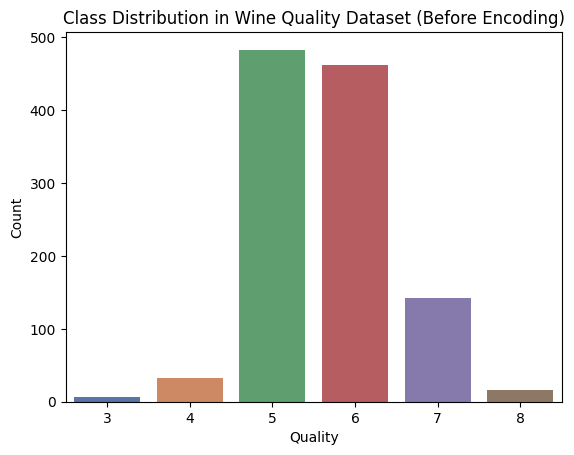

<ipython-input-30-93dbde7b0168>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality_binary', data=dataset1, palette="muted")


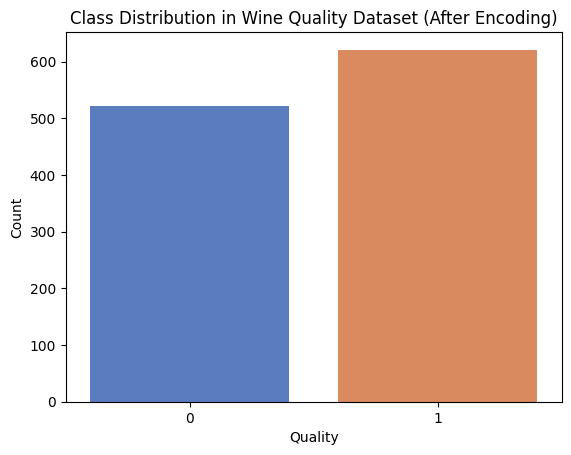

In [ ]:
# Plotting a bar chart to show the distribution of classes
sns.countplot(x='quality', data=dataset1, palette="deep")
plt.title("Class Distribution in Wine Quality Dataset (Before Encoding)")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

# Encoding Good Quality (>=6) = 1 and Bad Quality (<6) = 0 and adding "quality_binary column"
dataset1['quality_binary'] = dataset1['quality'].apply(lambda x: 1 if x >= 6 else 0)

print()
print()

#Plotting a bar chart to show the distribution of classes after encoding
sns.countplot(x='quality_binary', data=dataset1, palette="muted")
plt.title("Class Distribution in Wine Quality Dataset (After Encoding)")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

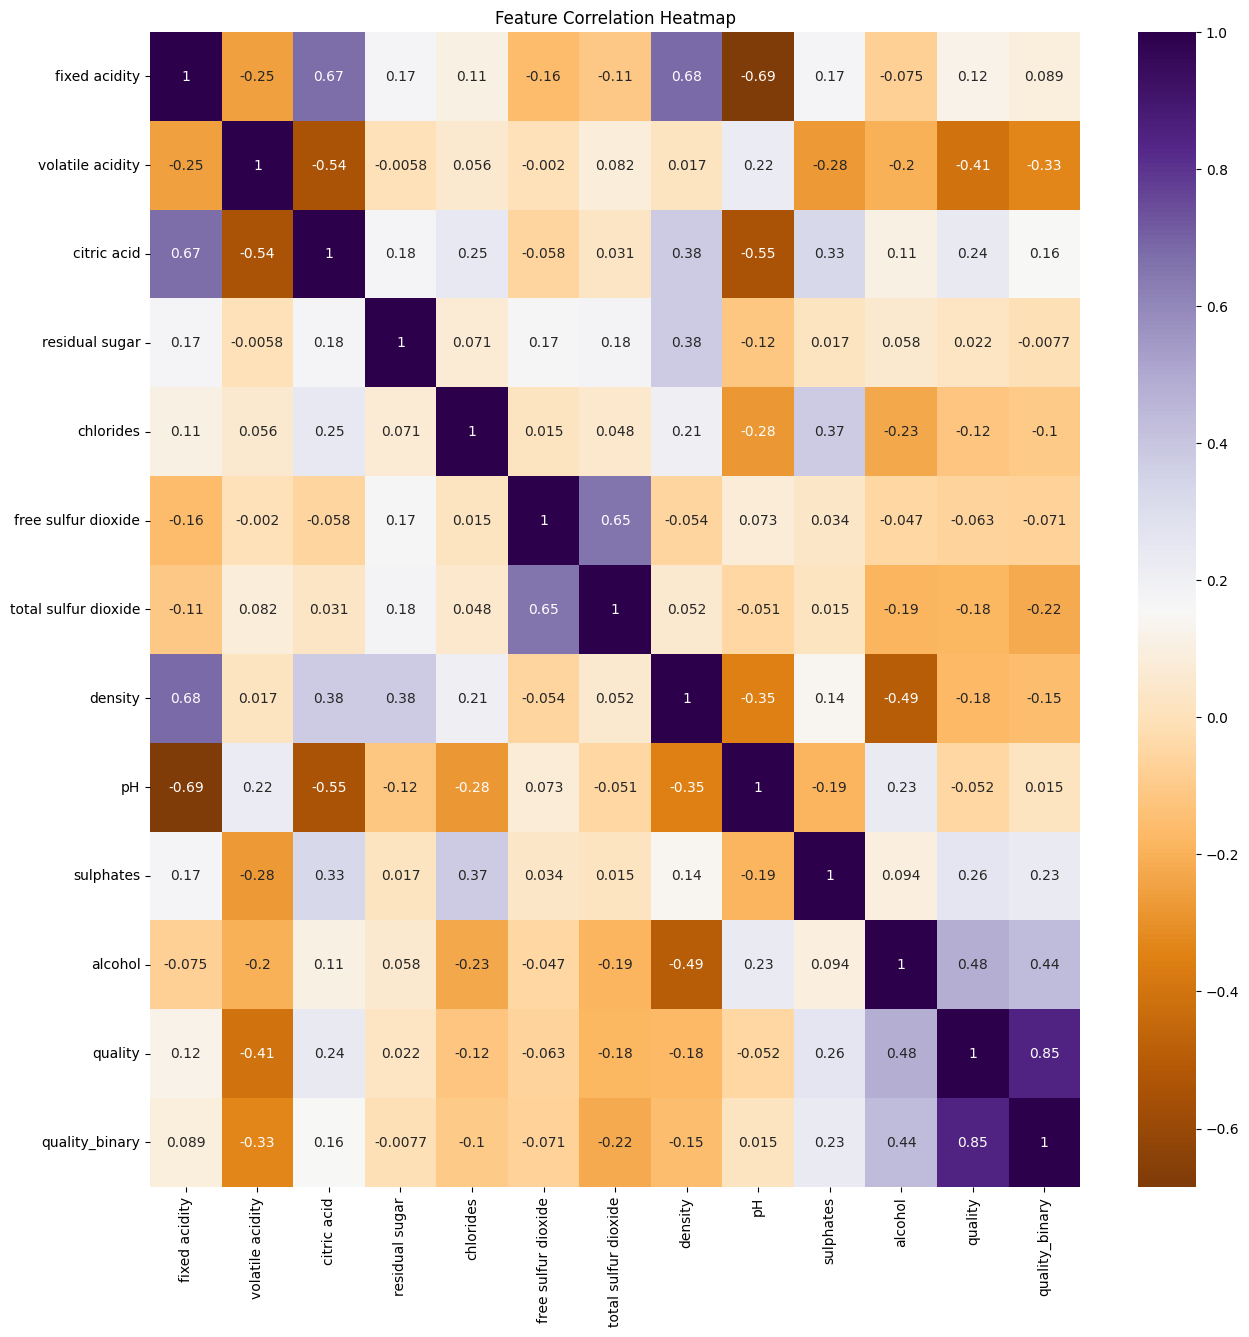

In [ ]:
# Separating input features (X) and target labels (y)
X = dataset1.drop(['quality', 'quality_binary'], axis=1) # Dropping original 'quality' column and binary column
y = dataset1['quality_binary']  # Using the binary target column

# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

# Standardizing the features to reduce skewness
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print()
print()

# Plotting a heatmap for feature correlation
plt.figure(figsize=(15, 15))
sns.heatmap(dataset1.corr(), annot=True, cmap= "PuOr")
plt.title("Feature Correlation Heatmap")
plt.show()

### **1. Logistic Regression**

The Training accuracy of the model is 0.76
The Testing accuracy of the model is 0.75
[[117  40]
 [ 45 141]]

classification report for Logistic Regrression

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       157
           1       0.78      0.76      0.77       186

    accuracy                           0.75       343
   macro avg       0.75      0.75      0.75       343
weighted avg       0.75      0.75      0.75       343



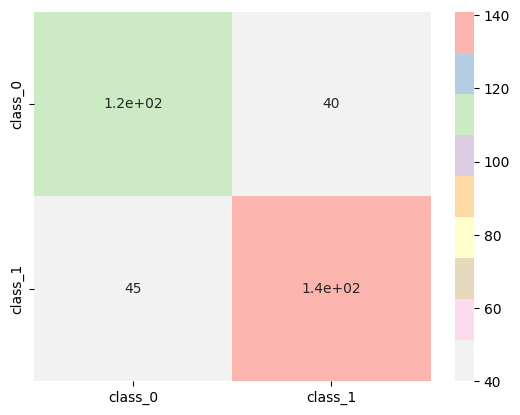

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()

model1 = logisticReg.fit(X_train, y_train)
prediction1 = model1.predict(X_test)
print("The Training accuracy of the model is {:.2f}".format(logisticReg.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(logisticReg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix #importing confusion matrix
confmat = confusion_matrix(y_test, prediction1)    #[true_positive, false_positive]
                                                   #[false_negative, true_negative]
from seaborn import heatmap
heatmap(confmat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

print(confmat)

from sklearn.metrics import classification_report
print("\nclassification report for Logistic Regrression\n")
print(classification_report(y_test, prediction1))

### **2. Decision Tree Classifier**

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.74
[[107  39]
 [ 50 147]]

classification report for Decision Tree

              precision    recall  f1-score   support

           0       0.73      0.68      0.71       157
           1       0.75      0.79      0.77       186

    accuracy                           0.74       343
   macro avg       0.74      0.74      0.74       343
weighted avg       0.74      0.74      0.74       343



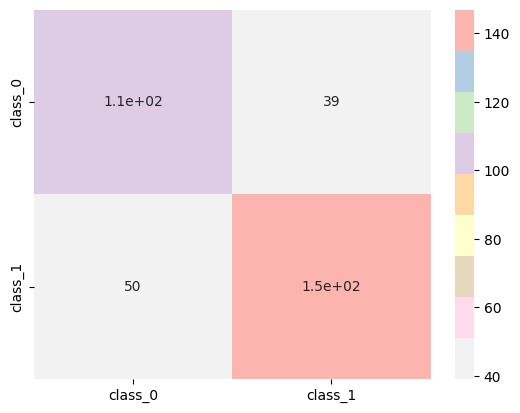

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
model2 = dtc.fit(X_train, y_train)

#Evaluation
print("The Training accuracy of the model is {:.2f}".format(dtc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(dtc.score(X_test, y_test)))

prediction2 = model2.predict(X_test)
confmat2 = confusion_matrix(prediction2,y_test)

from seaborn import heatmap
heatmap(confmat2 , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

print(confmat2)

print("\nclassification report for Decision Tree\n")
print(classification_report(y_test, prediction2))

### **3. Random Forest Classifier**

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.82
[[129  34]
 [ 28 152]]

classification report for Random Forest Classifier

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       157
           1       0.84      0.82      0.83       186

    accuracy                           0.82       343
   macro avg       0.82      0.82      0.82       343
weighted avg       0.82      0.82      0.82       343



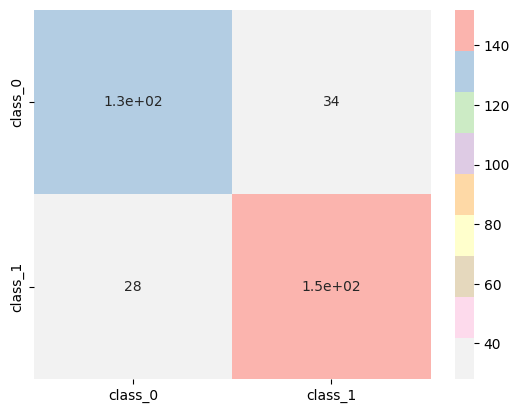

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)

#Evaluation
print("The Training accuracy of the model is {:.2f}".format(rfc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(X_test, y_test)))

prediction3 = model3.predict(X_test)

confmat3 = confusion_matrix(prediction3,y_test)
print(confmat3)
from seaborn import heatmap
heatmap(confmat3, cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

print("\nclassification report for Random Forest Classifier\n")
print(classification_report(y_test, prediction3))

### **4. K-Nearest Neighbors**


K-Nearest Neighbors Results:
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.66      0.68       157
           1       0.73      0.76      0.74       186

    accuracy                           0.71       343
   macro avg       0.71      0.71      0.71       343
weighted avg       0.71      0.71      0.71       343

Confusion Matrix:
 [[104  53]
 [ 45 141]]


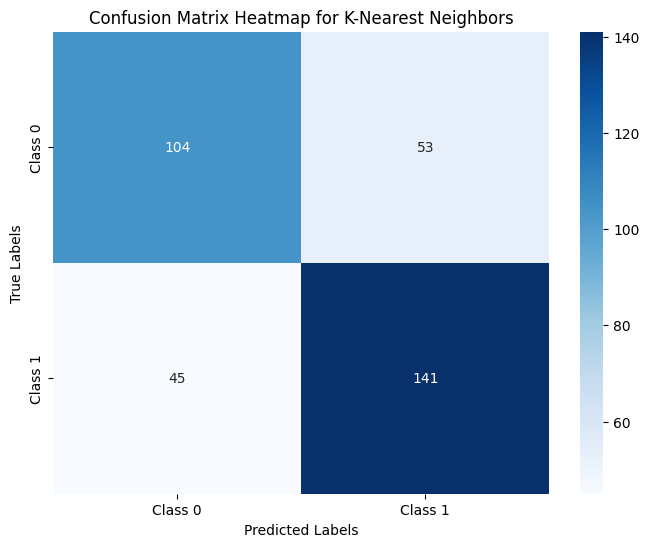

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Results
print("\nK-Nearest Neighbors Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix Heatmap for K-Nearest Neighbors")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

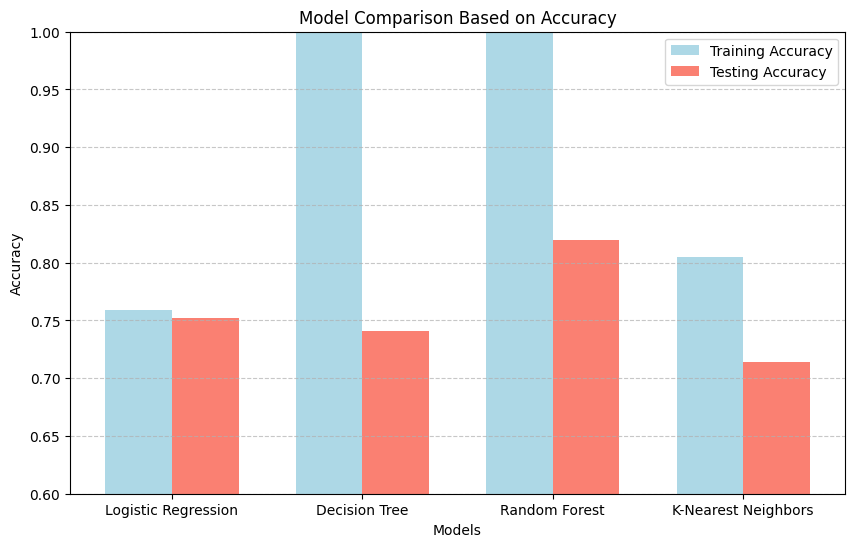

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
training_accuracies = [
    logisticReg.score(X_train, y_train),  # Logistic Regression Training Accuracy
    dtc.score(X_train, y_train),         # Decision Tree Training Accuracy
    rfc.score(X_train, y_train),         # Random Forest Training Accuracy
    knn.score(X_train, y_train),         # K-Nearest Neighbors Training Accuracy
]

testing_accuracies = [
    logisticReg.score(X_test, y_test),   # Logistic Regression Testing Accuracy
    dtc.score(X_test, y_test),          # Decision Tree Testing Accuracy
    rfc.score(X_test, y_test),          # Random Forest Testing Accuracy
    knn.score(X_test, y_test),          # K-Nearest Neighbors Testing Accuracy
]

# Model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']

# Plotting the bar chart
x = range(len(model_names))  # X-axis positions for the models
width = 0.35                 # Bar width

plt.figure(figsize=(10, 6))

# Plotting training accuracies
plt.bar(x, training_accuracies, width=width, label='Training Accuracy', color='lightblue')

# Plotting testing accuracies
plt.bar([i + width for i in x], testing_accuracies, width=width, label='Testing Accuracy', color='salmon')

# Adding labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison Based on Accuracy')
plt.xticks([i + width/2 for i in x], model_names)  # Aligning the x-ticks to the center of grouped bars
plt.legend()
plt.ylim(0.6, 1.0)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()